# Loading the Libraries 

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Extracting the Data from the csv

In [19]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Checking for null values 

In [20]:
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

### Performing Complete Case Analysis 

In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

### Revealing Different Genres

In [23]:
df.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

### Converting Duration from Miliseconds to Minutes for better plotting 

In [24]:
df['duration_min'] = (df['duration_ms']/60000).round(2)

In [25]:
df.columns.tolist()

['genre',
 'artist_name',
 'track_name',
 'track_id',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'duration_min']

In [26]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,1.66
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,2.29
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,2.84
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,2.54
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1.38


### Removal of Noise from Popularity

In [27]:
df = df[df['popularity']>0]

In [28]:
df.popularity.unique()

array([  1,   3,   4,   2,  15,  10,   8,   5,   6,   7,  11,  65,  63,
        62,  61,  68,  64,  66,  60,  69,  71,  76,  67,  70,  72,  57,
        59,  56,  28,  31,  74,  55,  53,   9,  13,  23,  12,  44,  33,
        25,  26,  24,  22,  20,  19,  18,  16,  17,  14,  83,  81,  73,
        78,  77,  75,  45,  42,  46,  54,  41,  52,  58,  51,  43,  47,
        48,  40,  50,  49,  39,  80,  37,  35,  21,  38,  36,  29,  34,
        32,  99, 100,  97,  92,  91,  95,  90,  93,  88,  87,  89,  96,
        86,  85,  84,  94,  82,  79,  27,  30,  98])

So here we have many values of popularity but for additional trend analysis we need just three High , Medium and Low we can convert this numerical values into categorical values using our own functions  

### Popularity Bucket

In [29]:
def pop_buck(pop):
    if pop >=75 :
        return 'High' 
    elif pop >= 50:
        return 'Medium'
    else :
        return 'Low'
df['popularity_bucket'] = df['popularity'].apply(pop_buck)

In [30]:
df = df.drop('duration_ms',axis=1)
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min,popularity_bucket
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.737,0.000,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816,2.29,Low
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,0.131,0.000,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368,2.84,Low
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,0.225,0.123,F,0.202,-21.150,Major,0.0456,140.576,4/4,0.390,1.38,Low
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.344,0.703,0.270,0.000,C#,0.105,-12.675,Major,0.9530,82.873,4/4,0.533,3.54,Low
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.939,0.416,0.269,0.000,F#,0.113,-8.949,Major,0.0286,96.827,4/4,0.274,4.00,Low


### We can start Analyzing our data in 4 insightful ways 
1. What makes a song popular ?
2. Genre Influence on Audio and popularity
3. Features Correlations , Covariances and Interactions
4. Artist & Track Insights  

# Insight 1 : What makes a song popular ? 

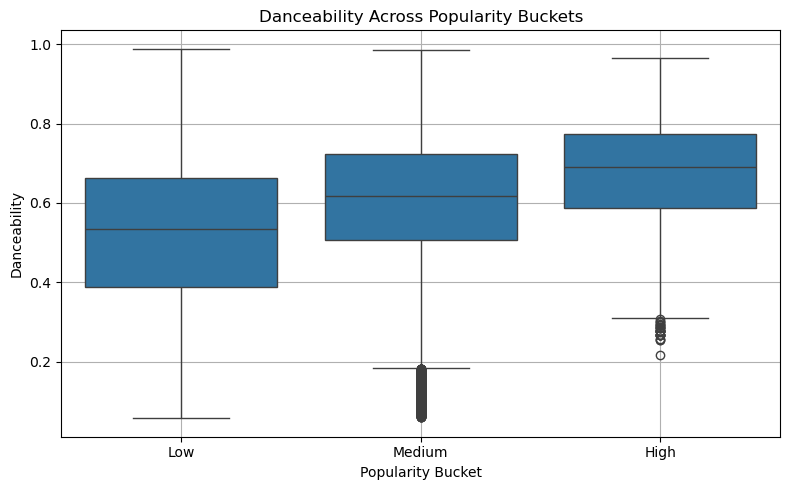

In [64]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='popularity_bucket', y='danceability')
plt.title('Danceability Across Popularity Buckets')
plt.xlabel('Popularity Bucket')
plt.ylabel('Danceability')
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/danceability_across_pop.png', dpi=150, bbox_inches='tight')

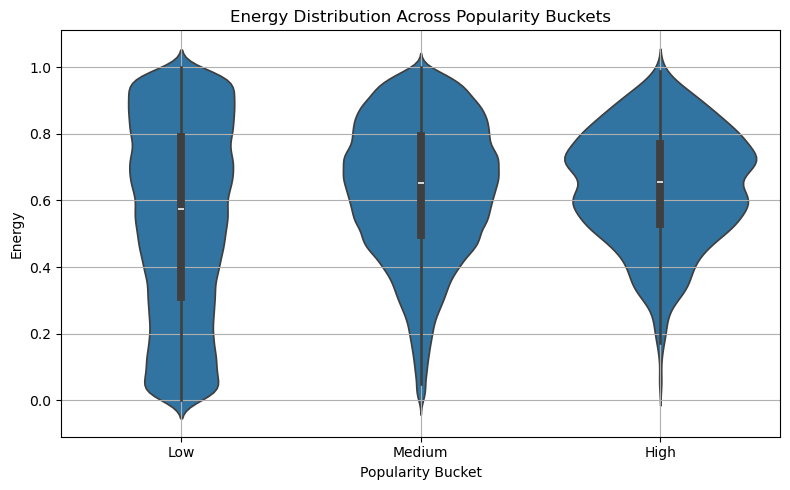

In [65]:

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='popularity_bucket', y='energy')
plt.title('Energy Distribution Across Popularity Buckets')
plt.xlabel('Popularity Bucket')
plt.ylabel('Energy')
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/energy_distribution_across_pop.png', dpi=150, bbox_inches='tight')

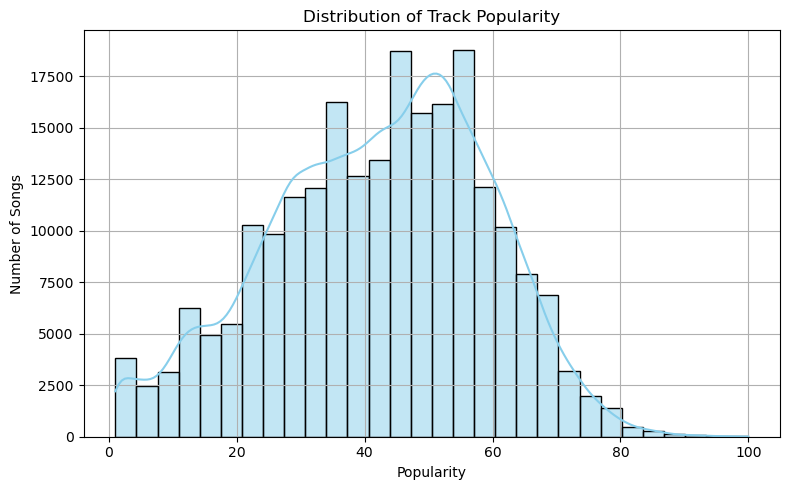

In [66]:

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='popularity', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/track_popularity.png', dpi=150, bbox_inches='tight')

# Insight 2 : Genre Influence on Audio and Popularity 

In [44]:
df['genre'].value_counts().index

Index(['Comedy', 'Soundtrack', 'Indie', 'Pop', 'Jazz', 'Children’s Music',
       'Electronic', 'Hip-Hop', 'Folk', 'Rock', 'Alternative', 'Rap', 'World',
       'Soul', 'R&B', 'Blues', 'Reggaeton', 'Anime', 'Ska', 'Reggae',
       'Country', 'Dance', 'Classical', 'Opera', 'Movie', 'Children's Music',
       'A Capella'],
      dtype='object', name='genre')

In [42]:
df[df['genre'].isin(top_genres)].groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10)

genre
Pop                 66.590667
Rap                 60.533795
Rock                59.645123
Hip-Hop             58.423131
Children’s Music    54.787911
Indie               54.707294
R&B                 52.343646
Alternative         50.251404
Folk                49.977830
Soul                47.173160
Name: popularity, dtype: float64

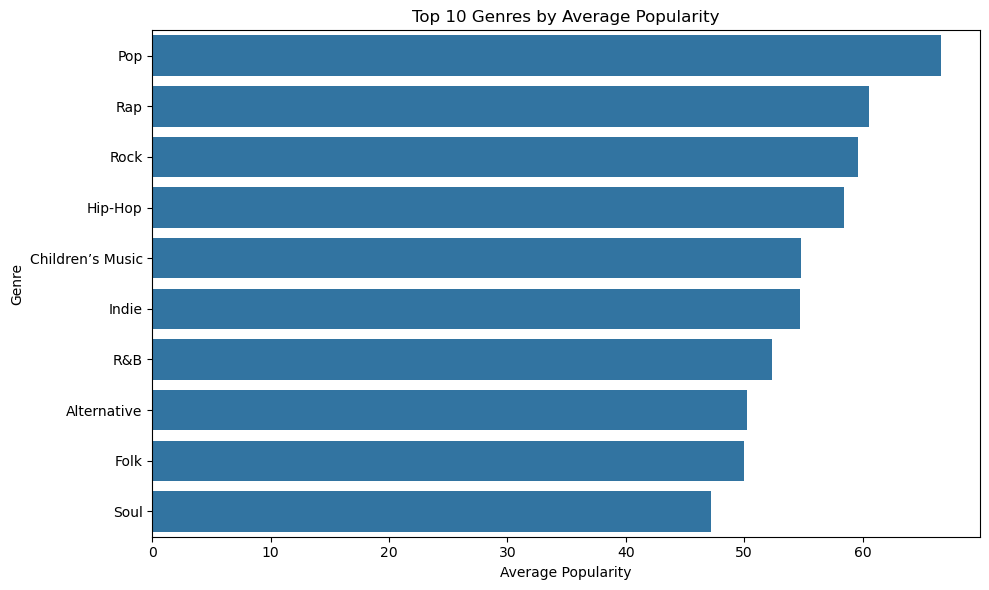

In [67]:
top_genres = df['genre'].value_counts().head(20).index
genre_popularity = df[df['genre'].isin(top_genres)].groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index)
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('visuals/top10_genres.png', dpi=150, bbox_inches='tight')

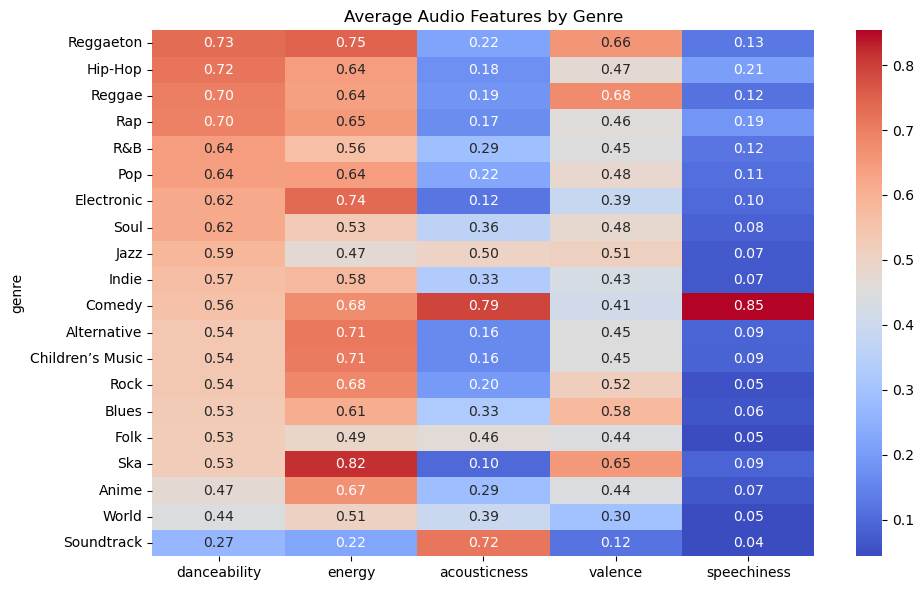

In [45]:

selected_features = ['danceability', 'energy', 'acousticness', 'valence', 'speechiness']
genre_audio = df[df['genre'].isin(top_genres)].groupby('genre')[selected_features].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(genre_audio.sort_values(by='danceability', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Audio Features by Genre')
plt.tight_layout()

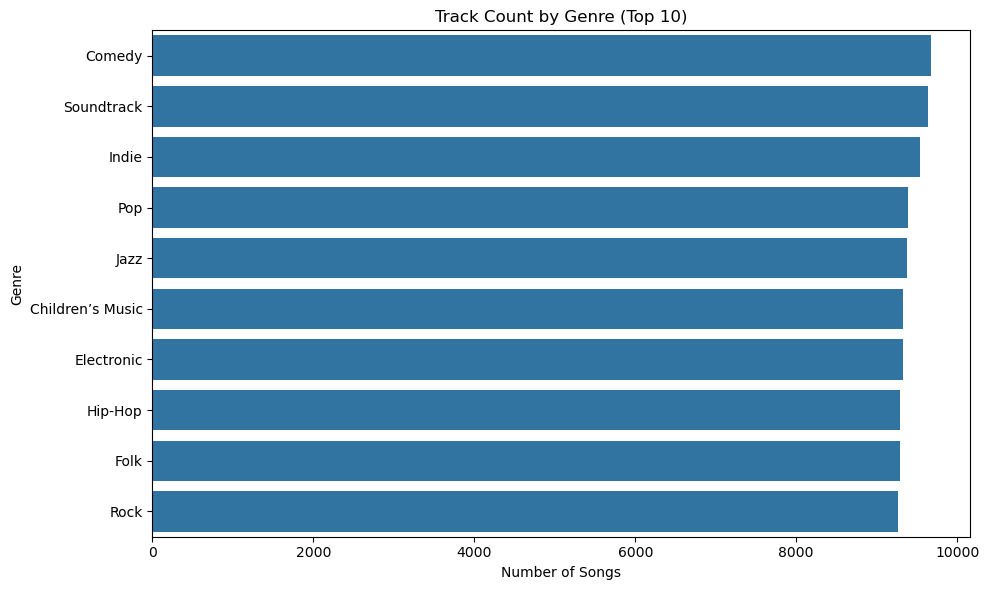

In [68]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['genre'].isin(top_genres)], y='genre', order=df['genre'].value_counts().loc[top_genres].index[:10])
plt.title('Track Count by Genre (Top 10)')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('visuals/top10_track_count.png', dpi=150, bbox_inches='tight')

# Insight 3 : Feature Correlations , Covariance and Interactions

In [47]:

features = [
    'popularity', 'danceability', 'energy', 'valence',
    'acousticness', 'speechiness', 'tempo',
    'instrumentalness', 'liveness', 'loudness', 'duration_min'
]

corr = df[features].corr()

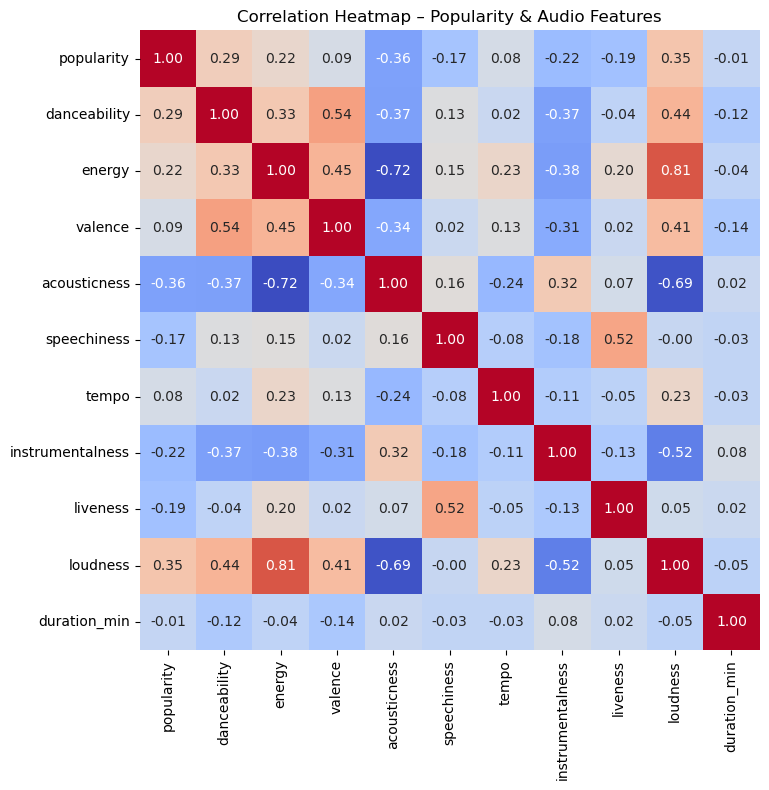

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True,cbar=False)
plt.title('Correlation Heatmap – Popularity & Audio Features')
plt.tight_layout()

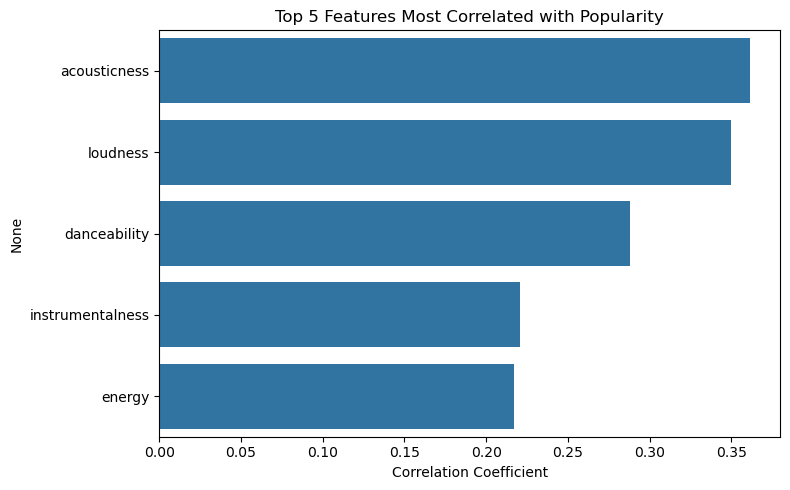

In [69]:

pop_corr = corr['popularity'].drop('popularity')
top_corr = pop_corr.abs().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top 5 Features Most Correlated with Popularity')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.savefig('visuals/top5_features_most_correlated.png', dpi=150, bbox_inches='tight')

In [51]:
cov = df[features].cov()

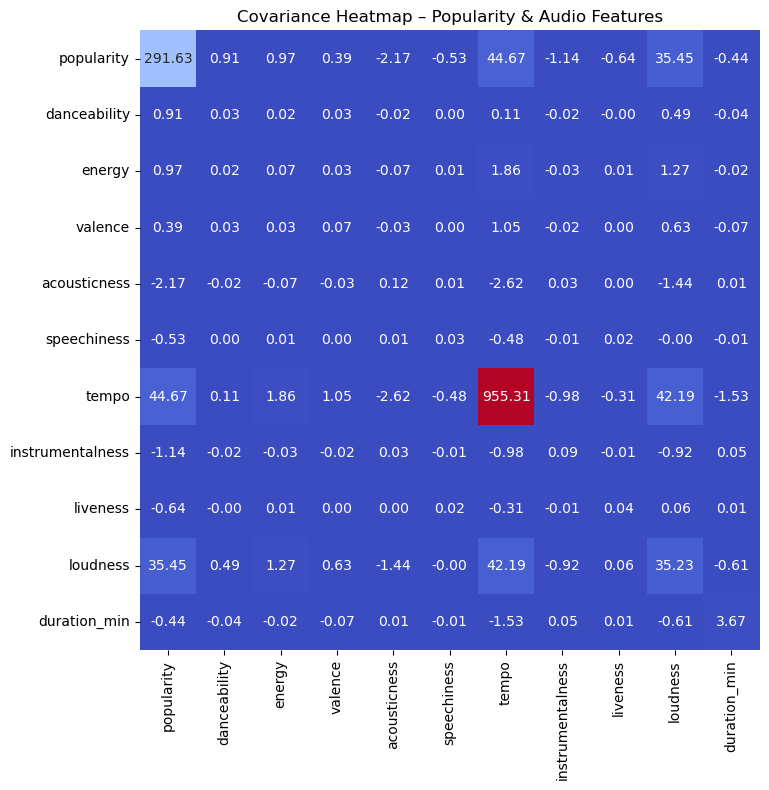

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(cov,annot=True, cmap='coolwarm', fmt=".2f", square=True,cbar=False)
plt.title('Covariance Heatmap – Popularity & Audio Features')
plt.tight_layout()

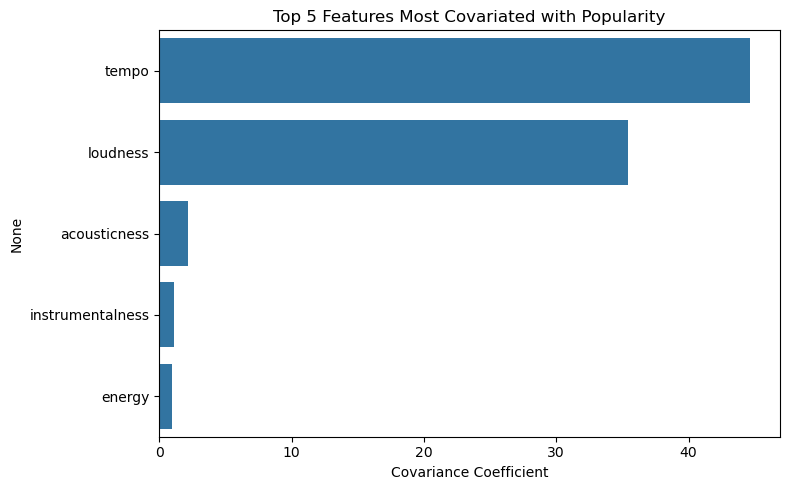

In [70]:
pop_cov = cov['popularity'].drop('popularity')
top_cov = pop_cov.abs().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_cov.values,y=top_cov.index)
plt.title('Top 5 Features Most Covariated with Popularity')
plt.xlabel('Covariance Coefficient')
plt.tight_layout()
plt.savefig('visuals/top5_most_covariated.png', dpi=150, bbox_inches='tight')

# Insight 4 : Artist & Track Highlights

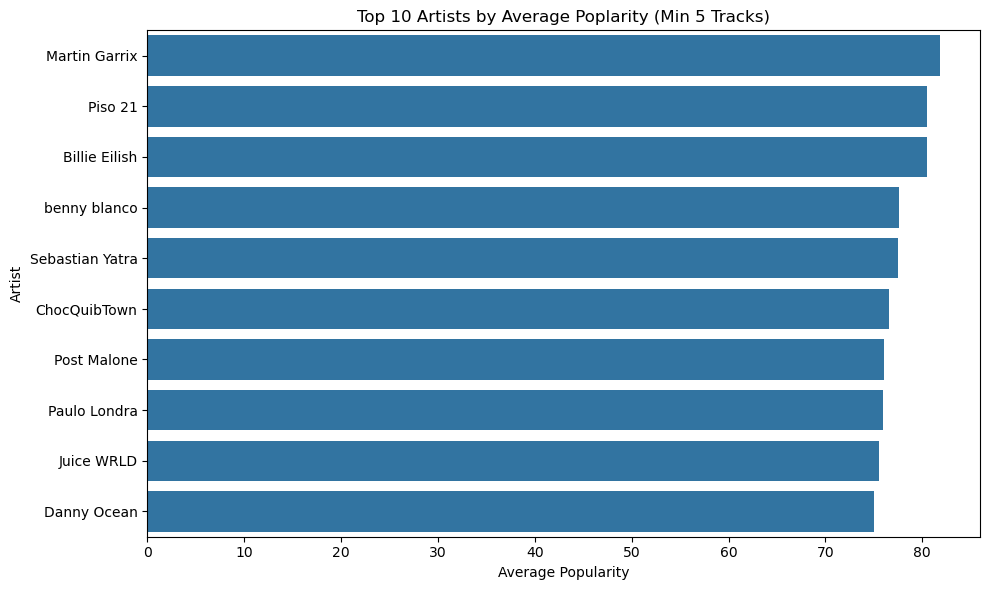

In [71]:
artist_group = df.groupby('artist_name').agg({
    'popularity': ['mean','count']
})
artist_group.columns = ['avg_popularity','track_count']
top_artists = artist_group[artist_group['track_count'] >= 5].sort_values('avg_popularity',ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_artists['avg_popularity'], y=top_artists.index)
plt.title('Top 10 Artists by Average Poplarity (Min 5 Tracks)')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.tight_layout()
plt.savefig('visuals/top10_artist.png', dpi=150, bbox_inches='tight')

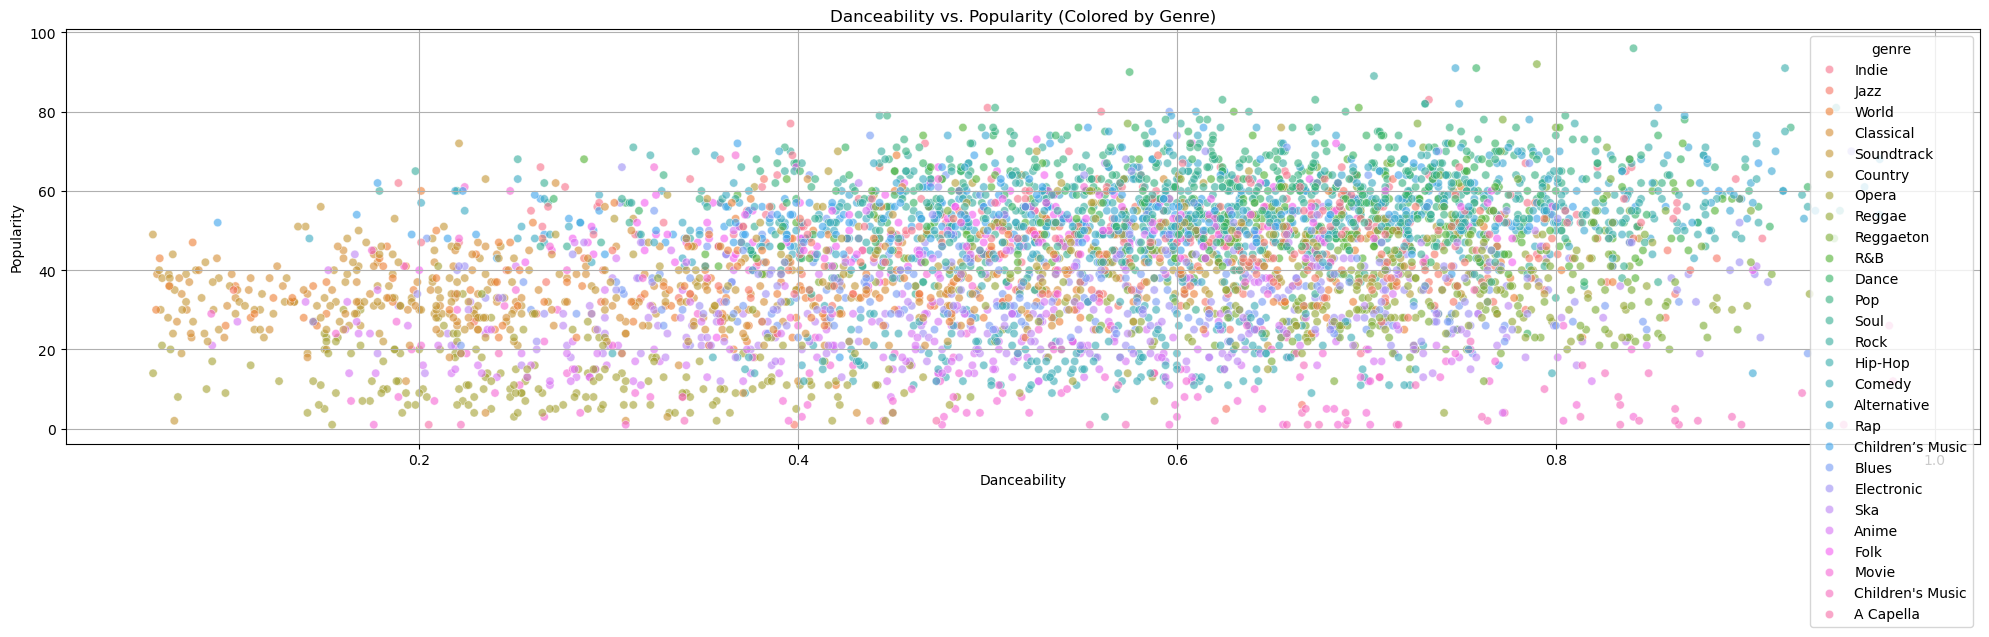

In [72]:

plt.figure(figsize=(20, 6))
sns.scatterplot(data=df.sample(5000), x='danceability', y='popularity', hue='genre', alpha=0.6, palette='husl')
plt.title('Danceability vs. Popularity (Colored by Genre)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/danceability_vs_popularity.png', dpi=150, bbox_inches='tight')

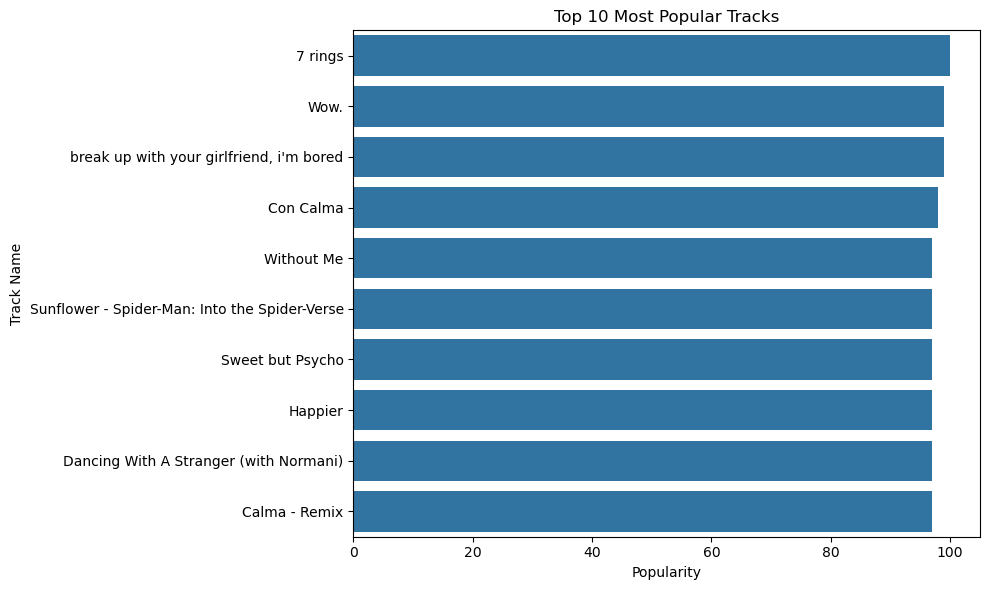

In [73]:

top_tracks = df.sort_values('popularity', ascending=False).drop_duplicates('track_name').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_tracks['popularity'], y=top_tracks['track_name'])
plt.title('Top 10 Most Popular Tracks')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.tight_layout()
plt.savefig('visuals/top10_most_popular_tracks.png', dpi=150, bbox_inches='tight')